Foi escolhido analisar os dados sobre o Titanic. Um dos maiores acidentes da navegação maritima. Iconizado no filme que foi o filme com maior bilheteria por anos. Será que se sustenta o que se apresentou no filme? Será que as as mulheres e crianças eram realmente salvas primeiro? Os ricos foram privilegiados?

Algumas perguntas iniciais a serem feitas para se verificar isso são:

1º Ser mulher teve alguma influência na chance de sobrevivência?

2º E ser criança? 

3º Qual relação entre poder financeiro(representada pela classe) e sobrevivência?

Após isso iremos cruzar os dados.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt


#Lendo os dados basicos.#
Titanic_data_raw=pd.read_csv('titanic_data.csv')
#Ver os dados para se ter uma idéia deles.
Titanic_data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Verificarei esses NaN e aonde eles aparecem. Lembrando que Cabin representa a cabine que a pessoa estava. Fare é o custo da passagem. Embarked é aonde a pessoa embarcou, Parch é o numero de parentes na forma país ou filhos e SibSp é o número de parentes na forma irmão, irmã, esposo ou esposa.

In [2]:
#verificando dados NaN(não válidos) no arquivo#
Titanic_data_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Infelizmente nota-se muita Muitas idades desconhecidas nos dados da idade. O mais desastroso foi a cabine. Houve também pequenos erros na embarcação. Tenho que corrigir esses erros.

O dado da cabine não planejo usa-lo e para evitar uso por engano futuro considero simplesmente apagar essa coluna. Para o dado Embarked que também não há planos previos de uso irei analisar essas 2 únicas pessoas na qual ele está faltando.

In [3]:
#seleciona somente os embarked nan
Titanic_data_raw[Titanic_data_raw['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


curiosamente eram da mesma cabine e tinham o mesmo ticket. Antes de tomar uma decisão irei examinar quantas pessoas tinham tickets duplicados. 

In [4]:
#analise de pessoas duplicadas
print Titanic_data_raw.duplicated(keep=False).sum()
#analise de tickets duplicados
print Titanic_data_raw.duplicated('Ticket',False).sum()

0
344


344 duplicadas é algo razoavel. já não devo analisar o ticket como fator. também aproveitei para verificar que não há linhas completamente duplicadas. Minha decisão final é simplesmente eliminar essas duas colunas Elas não devem vir a ser relevantes para nossa análise. Caso sejam voltaremos a elas.

In [5]:
#deletando dados perigosos e provavelmente não úteis úteis
del Titanic_data_raw['Ticket']
del Titanic_data_raw['Embarked']
del Titanic_data_raw['Cabin']

Ainda falta a idade. Que é um dado que queremos analisar. Para esse simplesmente terei que eliminar as linhas que faltarem dados. pois a uma outra opção estatística que seria colocar a média da idade não me diz nada já que irei querer análisar a relação criança/adulto que é binária.

In [6]:
Titanic_data_raw=Titanic_data_raw.dropna()

Agora alteramos a idade por um valor binário booleano que marca se é verdade se a pessoa em questão tem mais de 12 anos. Isso foi feito para se analisar diferenças entre maiores e menores de idade. 

In [7]:
#dividindo os passageiros por faixa etaria
Titanic_data_raw["Age_group"] = pd.cut(Titanic_data_raw.Age, [0, 12, 150], labels=["Menor", "Maior"])

Logo, após nossa preparação dos dados temos que nossos dados ficaram:


In [8]:
#revisita a tabela de dados
Titanic_data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Maior
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Maior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Maior
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Maior
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Maior


Farei um quadro geral com as quantidades enumeraveis para os 3 casos que estamos a analisar. 

In [9]:
print Titanic_data_raw.groupby('Sex')['Survived'].describe()
print Titanic_data_raw.groupby('Age_group')['Survived'].describe()
print Titanic_data_raw.groupby('Pclass')['Survived'].describe()

        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female  261.0  0.754789  0.431039  0.0  1.0  1.0  1.0  1.0
male    453.0  0.205298  0.404366  0.0  0.0  0.0  0.0  1.0
           count      mean       std  min  25%  50%  75%  max
Age_group                                                    
Maior      645.0  0.387597  0.487580  0.0  0.0  0.0  1.0  1.0
Menor       69.0  0.579710  0.497222  0.0  0.0  1.0  1.0  1.0
        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       186.0  0.655914  0.476352  0.0  0.0  1.0  1.0  1.0
2       173.0  0.479769  0.501041  0.0  0.0  0.0  1.0  1.0
3       355.0  0.239437  0.427342  0.0  0.0  0.0  0.0  1.0


A média de mulheres está muito maior que as de homem. O que mostra que sobreviveram mais mulheres. Já as crianças também viveram mais. Nota-se também a progressão infelizmente esperada nas classes sociais. Porém eu quero saber qual a chance de isto ter sido só um desvio estátistico. para tanto farei um teste t.

# 1º Teste T

Considerarei durante o teste que meus dados são só uma amostra pois irei comparar com uma população ficticia para ver a chance de o que aconteceu ter sido puramente aleatório. Usarei o $\alpha=0.05$ como meu crivo.


Minha hipótese nula é de que não haverá diferença entre a sobrevivência das mulheres e a dos homens. $\mu_H=\mu_M$ que pode ser reescrita como $\mu_H-\mu_M=0$ já a hipótese alternativa é $\mu_H-\mu_M \neq 0$. Aonde os $\mu$ representam a população de homens e mulheres salvas. Usarei two-sided tail por considerar não ter motivos iniciais para ir pra nenhum dos lados. Usarei hipóteses similares para classes sociais(comparando a primeira e a terceira) e para a faixa etária.

In [10]:
def T_estatistica(DataFrame1,DataFrame2,Grupo1,Grupo2,Alvo1,Alvo2):
    """Retorna a probabilidade e a estátistica t
     Args:
        DataFrame1 (Dataframe): Dataframe da amostra 1
        DataFrame2 (Dataframe): Dataframe da amostra 2
        Grupo1 (str): grupo da amostra 1
        Grupo2 (str): grupo da amostra 2
        Alvo1 (str): elemento a ser analisado da amostra 1
        Alvo2 (str): elemento a ser analisado da amostra 2

    Returns:
        estatística t e probabilidade.
    """
    return scipy.stats.ttest_ind(DataFrame1.groupby(Grupo1).get_group(Alvo1)['Survived'],\
    DataFrame2.groupby(Grupo2).get_group(Alvo2)['Survived'], equal_var=True)
     

In [11]:
#imprimir as estatísticas relevantes
print 'Sexo: ', T_estatistica(Titanic_data_raw,Titanic_data_raw,'Sex','Sex','male','female'),'\n'
print 'Faixa Etária: ',T_estatistica(Titanic_data_raw,Titanic_data_raw,'Age_group','Age_group','Maior','Menor'),'\n'
print 'Classe Social: ',T_estatistica(Titanic_data_raw,Titanic_data_raw,'Pclass','Pclass',3,1), '\n'


Sexo:  Ttest_indResult(statistic=-17.067146369266009, pvalue=5.2247099268015708e-55) 

Faixa Etária:  Ttest_indResult(statistic=-3.1048462919585798, pvalue=0.0019792517983729784) 

Classe Social:  Ttest_indResult(statistic=-10.344880036138225, pvalue=5.3076036867843702e-23) 



Para anular a hipótese nula precisavamos de $p<0.025$.

Portanto conseguimos anular a hipótese nula quanto ao sexo, a classe e maioridade. O que mostra que sim. ser rico tem alguma relação com sobreviver. Assim como o sexo e a maioridade.

Mas ainda estou curioso e irei testar mais 2 perguntas:

1ª Existiam mais mulheres na primeira classe?(Uma possivel explicação para os dois terem gerado maior sobrevivência)

2ª Existiam mais crianças na terceira classe?(considerando que o sexo da criança é um interesse menor na sua sobrevivência)

# Gráficos

começarei plotando um gráfico q mostre esta relação entre sexo e classe social.

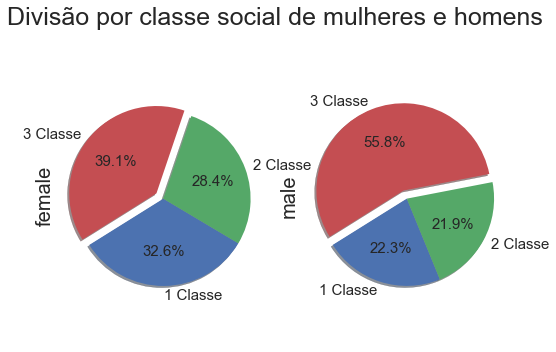

In [12]:
#código para imprimir o gráfico. Primeiro preparo os dados na variavel Figura
Figura=pd.DataFrame({'female': [0,0,0],'male':[0,0,0]})
def Conta_Classe_Se(Alvo1,Alvo2):
    """Conta quantas vezes aquele aquele elemento pertenceu a aquela classe
     Args:
        param1 (int): Classe que pertence(0, 1 ou 2).
        param2 (str): grupo que pertence a classe 

    Returns:
        nada útil só muda a váriavel global Figura que precisa estar num formato como:
        pd.DataFrame({'female': [0,0,0],'male':[0,0,0]}).
    """
    if(not pd.isnull(Alvo2)):
        Figura.loc[Alvo1,Alvo2]+=1
    return 0

params = {'font.size': 15.0}
plt.rcParams.update(params)
Titanic_data_raw.apply(lambda row: Conta_Classe_Se(row['Pclass']-1,row['Sex']), axis= 1)
labels=['1 Classe', '2 Classe', '3 Classe']

eixo1, eixo2=Figura.plot.pie(labels=labels,explode=(0,0,0.1), startangle=212,subplots=True,legend=False,autopct='%1.1f%%',shadow=True)
eixo1.axis('equal')
eixo1.set_ylabel('female',size=20)
eixo1.texts[0].set_fontsize(15)
eixo1.texts[2].set_fontsize(15)
eixo1.texts[4].set_fontsize(15)
eixo2.axis('equal')
eixo2.set_ylabel('male',size=20)
eixo2.texts[0].set_fontsize(15)
eixo2.texts[2].set_fontsize(15)
eixo2.texts[4].set_fontsize(15)
plt.suptitle(u'Divisão por classe social de mulheres e homens',size=25)

plt.show()

Como nota-se no gráfico. As mulheres eram maioria na primeira classe. Logo isso pode ter ajudado elas terem sobrevivido. Porém a diferença é pouca. Antes de analisar isso irei executar o mesmo grafico para crianças. Lembrando que True significa que é maior de idade.

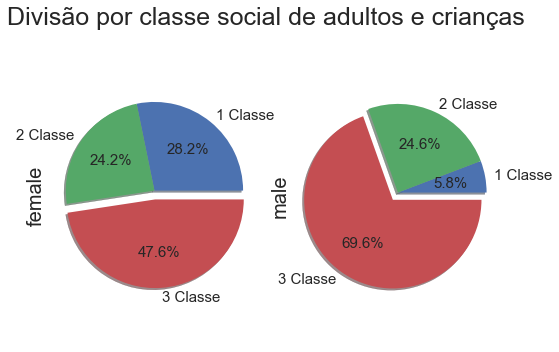

In [13]:
#executo mesma operações de anteriormente. N transformarei em função por ser só 2 vezes que aplicarei isso
Figura=pd.DataFrame({'Menor': [0,0,0],'Maior':[0,0,0]})
Titanic_data_raw.apply(lambda row: Conta_Classe_Se(row['Pclass']-1,row['Age_group']), axis= 1)
labels=['1 Classe', '2 Classe', '3 Classe']
eixo1, eixo2=Figura.plot.pie(labels=labels,explode=(0,0,0.1), startangle=0,subplots=True,legend=False,autopct='%1.1f%%',shadow=True)
eixo1.axis('equal')
eixo1.set_ylabel('female',size=20)
eixo1.texts[0].set_fontsize(15)
eixo1.texts[2].set_fontsize(15)
eixo1.texts[4].set_fontsize(15)
eixo2.axis('equal')
eixo2.set_ylabel('male',size=20)
eixo2.texts[0].set_fontsize(15)
eixo2.texts[2].set_fontsize(15)
eixo2.texts[4].set_fontsize(15)
plt.suptitle(u'Divisão por classe social de adultos e crianças',size=25)
plt.show()

ou seja. Em nossos dados tinhamos muitas crianças na terceira classe. O que com grande possibilidade alterou nosso resultado. Irei fazer a analise por classe tanto para a idade quanto para o sexo para ver se há diferenças nos resultados. Plotarei primeiro o gráfico relacionando essas variáveis.


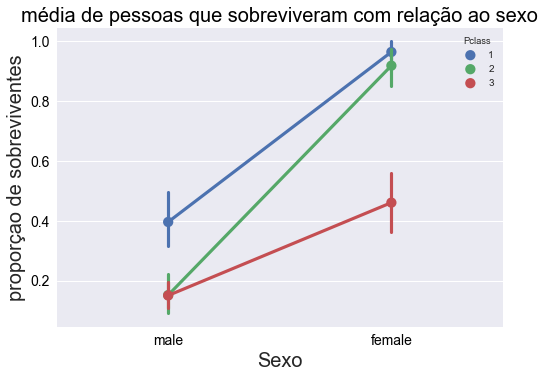

In [14]:
#funcao vista na documentação do sns
#ploto o grafico e o configuro para ficar mais legivel

Figura=sns.pointplot(x='Sex', y='Survived', hue='Pclass',data=Titanic_data_raw)
titulo = u'média de pessoas que sobreviveram com relação ao sexo'
Figura.axes.set_title(titulo ,fontsize=20,color="black",alpha=1)
Figura.axes.set_xlabel('Sexo',fontsize=20)
Figura.axes.set_ylabel(u'proporçao de sobreviventes',fontsize=20)
Figura.tick_params(labelsize=14,labelcolor="black")
plt.show()

nota-se que sempre há aumento na sobrevivência nos nossos dados sobre as mulheres. Nesse gráfico em especifico fica evidente o aumento da sobrevivência para a segunda classe. plotarei o mesmo gráfico mas para crianças e mulheres agora.

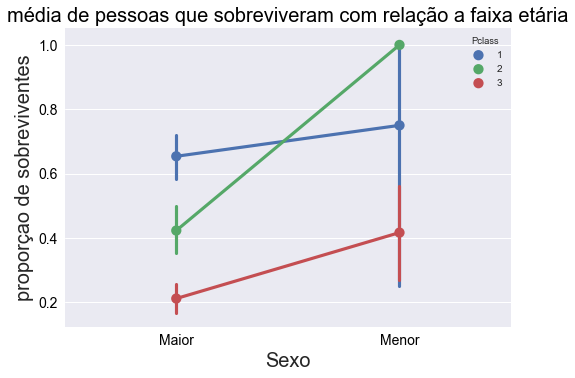

In [15]:
#funcao vista na documentação do sns
#ploto o grafico e o configuro para ficar mais legivel

Figura=sns.pointplot(x='Age_group', y='Survived', hue='Pclass',data=Titanic_data_raw)
titulo = u'média de pessoas que sobreviveram com relação a faixa etária'
Figura.axes.set_title(titulo ,fontsize=20,color="black",alpha=1)
Figura.axes.set_xlabel('Sexo',fontsize=20)
Figura.axes.set_ylabel(u'proporçao de sobreviventes',fontsize=20)
Figura.tick_params(labelsize=14,labelcolor="black")
plt.show()

O comportamento para o sexo é razoavelmente esperado. Nota-se a grande queda da sobrevivência de mulheres da terceira classe. Mas o comportamento da idade foi muito estranho. As crianças apresentaram um grande desvio padrão na sua taixa de sobrevivência. Irei plotar o Tamanho das amostras em busca de informação.

# 2ª Análise

In [16]:
print Titanic_data_raw.groupby(['Age_group', 'Pclass'])['Survived'].count()

Age_group  Pclass
Maior      1         182
           2         156
           3         307
Menor      1           4
           2          17
           3          48
Name: Survived, dtype: int64


os dados das crianças de primeira e segunda classe são poucos. Uma possivel explicação para o porquê as crianças de segunda classe tiveram mais salvação do que as de primeira seja por elas terem as mães presentes e as da primeira estarem mais com as babás. Analisando os  dados Parch junto com a idade:


In [17]:
print Titanic_data_raw.groupby(['Age_group','Pclass','Parch'])['Survived'].mean()


Age_group  Pclass  Parch
Maior      1       0        0.641791
                   1        0.666667
                   2        0.764706
                   4        0.000000
           2       0        0.357724
                   1        0.619048
                   2        0.700000
                   3        1.000000
           3       0        0.206897
                   1        0.208333
                   2        0.400000
                   3        0.333333
                   4        0.000000
                   5        0.200000
                   6        0.000000
Menor      1       2        0.750000
           2       1        1.000000
                   2        1.000000
           3       0        0.666667
                   1        0.500000
                   2        0.285714
Name: Survived, dtype: float64


Notamos que essa hipótese é inviável. As crianças da primeira e segunda classe nunca estavam sem os país. Analisando o tamanho da amostra espero ver se há dados na terceira classe para alguma análise do impacto da existência de país.

In [18]:
Titanic_data_raw.groupby(['Age_group','Pclass','Parch'])['Survived'].count()

Age_group  Pclass  Parch
Maior      1       0        134
                   1         30
                   2         17
                   4          1
           2       0        123
                   1         21
                   2         10
                   3          2
           3       0        261
                   1         24
                   2         10
                   3          3
                   4          3
                   5          5
                   6          1
Menor      1       2          4
           2       1         11
                   2          6
           3       0          3
                   1         24
                   2         21
Name: Survived, dtype: int64

Infelizmente havia somente 3 crianças sem os país na terceira classe. O que me faz acreditar que seria muito difícil  por conta da baixa quantidade de dados obter informação relevante.

Será analisado os dados das mulheres portanto. Já que estes são mais abundantes. será analisado se ser mulher mas da terceira classe te torna mais ou menos capaz de sobreviver.

In [19]:
#nessa sessão crio dataframes contendo os dados somente para cada classe. Prevendo que eles podem ser úteis 
#para uma análise por classe 


Df_Classe1=Titanic_data_raw.copy()
Df_Classe1=(Titanic_data_raw[Titanic_data_raw['Pclass']==1])
Df_Classe1=Df_Classe1.dropna()
print 'Pessoas na primeira classe', '\n',(Df_Classe1.groupby(['Sex'])['Survived']).describe(),'\n\n\n'
Df_Classe2=Titanic_data_raw.copy()
Df_Classe2=(Titanic_data_raw[Titanic_data_raw['Pclass']==2]).dropna()
Df_Classe2=Df_Classe2.dropna()
print 'Pessoas na Segunda classe', '\n',(Df_Classe2.groupby(['Sex'])['Survived']).describe(),'\n\n\n'
Df_Classe3=Titanic_data_raw.copy()
Df_Classe3=(Titanic_data_raw[Titanic_data_raw['Pclass']==3]).dropna()
Df_Classe3=Df_Classe3.dropna()
print 'Pessoas na terceira classe', '\n',(Df_Classe3.groupby(['Sex'])['Survived']).describe()

Pessoas na primeira classe 
        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female   85.0  0.964706  0.185617  0.0  1.0  1.0  1.0  1.0
male    101.0  0.396040  0.491512  0.0  0.0  0.0  1.0  1.0 



Pessoas na Segunda classe 
        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female   74.0  0.918919  0.274823  0.0  1.0  1.0  1.0  1.0
male     99.0  0.151515  0.360375  0.0  0.0  0.0  0.0  1.0 



Pessoas na terceira classe 
        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female  102.0  0.460784  0.500921  0.0  0.0  0.0  1.0  1.0
male    253.0  0.150198  0.357973  0.0  0.0  0.0  0.0  1.0


Pela tabela nota-se que o comportamento foi conforme o esperado. Tentarei pegar o caso extremo de uma mulher da terceira classe e verificar se mesmo assim ela tem mais chance de viver que um homem, a compararei com homens de cada uma das classes e da população geral. A hipótese nula é sempre que a população de  mulheres da terceira classe sobreviverão o mesmo que os homens da situação em questão: $\mu_{mulheres_3}=\mu_{homens}$

In [20]:
print u'Mulheres da terceira classe versus:', '\n'
print u' 1ª Classe: ',T_estatistica(Df_Classe1,Df_Classe3,'Sex','Sex','male','female'), '\n'
print u' 2ª Classe: ',T_estatistica(Df_Classe2,Df_Classe3,'Sex','Sex','male','female'), '\n'
print u' 3ª Classe: ',T_estatistica(Df_Classe3,Df_Classe3,'Sex','Sex','male','female'), '\n'
print u' Homens sem restrição: ',T_estatistica(Titanic_data_raw,Df_Classe3,'Sex','Sex','male','female'), '\n'

Mulheres da terceira classe versus: 

 1ª Classe:  Ttest_indResult(statistic=-0.929406399227516, pvalue=0.35379333031765492) 

 2ª Classe:  Ttest_indResult(statistic=-5.0117457833777843, pvalue=1.1886032017080196e-06) 

 3ª Classe:  Ttest_indResult(statistic=-6.5534628814034992, pvalue=1.993817017245084e-10) 

 Homens sem restrição:  Ttest_indResult(statistic=-5.5025842096127819, pvalue=5.7317122462286683e-08) 



Calculo da probabilidade de se a hipótese nula pode ser anulada. Lembrando que as hipóteses e o $\alpha$ crítico permanecem inalterados($\alpha=0.05$)

$P_1<0.3538$

$P_2<0.0001$

$P_3<0.0001$

$P_t<0.0001$

Como os $P<P_c=0.025$ para todos os casos menos para os homens da primeira classe. Conseguimos eliminar para esses casos a hipótese nula. O mais importante era o da população total de homens. O que mostra que mesmo sendo da terceira classe houve um benefício em ser mulher, mas isso não se verificou ao se comparar com os homens da primeira classe. O que na teoria da época não era para ter acontecido.

#   Conclusão:
    
    
   Ao longo dessa analise comprovamos que ser mulher, ser criança e alta classe tem influência na sua chance de sobreviver. Não foi obtido os comparativos com a classe e a faixa etária pela baixa quantidade de dados. Porém, para as mulheres, foi obtido que elas sempre se salvam mais que os homens, menos quando comparadas aos homens da primeira classe. Aonde o teste t não foi capaz de anular a hipótese nula.
   
   É importante resaltar que tivemos pessoas cortadas da análise na fase de preparação de dados e que o número total de pessoas no arquivo original (891) já era menor que o número de pessoas no Titanic. O que concerteza diminui a precisão das nossas conclusões.
   
   Outro fator de risco é variaveis ocultas. Me intriga saber o número de funcionarios e a localização geografica das pessoas poderia ser útil também.
    Apesar dos contra-tempos, obtemos informações com probabilidades muito baixas de estarem erradas.